In [1]:
import os
import pandas as pd
import warnings
from utils import boson_predict
warnings.filterwarnings('ignore')
from bixin import predict

picture_path = f"{os.path.dirname(os.getcwd())}\\figures\\"

dataset = pd.read_csv('./result/comments.csv', sep='/', parse_dates=['datetime'])
dataset['content'] = dataset['content'].apply(lambda x: eval(x))
# 基于机器学习模型
dataset['modelscore'] = dataset['content'].apply(lambda x: predict(' '.join(x)))
# 基于BonsonNLP情感分析
dataset['dictscore'] = boson_predict(dataset['content'])
# 情感的分标准化
dataset['dictscore'] = dataset['dictscore'].apply(lambda x: 1.5 if float(x)>3 else float(x))
dataset['score'] = dataset['score'].apply(lambda x: x-3)
# 情感的分加权计算
dataset['modelscore'] = dataset['modelscore'].apply(lambda x: x*2 if x>0 else x*2+0.5)
dataset['dictscore'] = dataset['dictscore'].apply(lambda x: x-1 if x>1 else x)
dataset['feelingscore'] = (dataset['modelscore']+ dataset['dictscore'])/2
dataset.reset_index(drop=True)

dataset[['feelingscore','content']].to_csv('./datas/feelingscore.csv', sep='/',index=False)

print(dataset['feelingscore'].sum(), dataset['feelingscore'].sum()/10520)
dataset[['content','feelingscore','datetime','location']]

Building prefix dict from C:\envs\travelspy310\lib\site-packages\bixin\data\dict.txt.big ...
Loading model from cache C:\Users\shelhen\AppData\Local\Temp\jieba.ucebba9eb1a0313c0246f939410a1a1cb.cache
Loading model cost 0.620 seconds.
Prefix dict has been built succesfully.


8396.131734808894 0.7981113816358264


,content,feelingscore,datetime,location
0,"[龟山汉墓, 点石园, 西汉, 楚王, 刘注, 夫妻, 合葬墓, 两千多年, 前, 人工, ...",0.803420,2024-01-05 11:45:41,山东省
1,"[下车, 许许多多, 茂盛, 大树, 碧绿, 小草, 五颜六色, 花朵, 争奇斗艳, 走进,...",1.335512,2024-02-01 07:24:50,江苏省
2,"[订票, 不用, 取票, 二维码, 扫码, 进, 厚重, 历史感, 古人, 智慧, 卓然, ...",1.019923,2024-01-14 09:20:05,江苏省
3,"[过年, 期间, 导游, 请, 幸好, 听听, 听到, 点, 背后, 故事, 龟山汉墓, 楚...",1.143777,2024-02-15 03:46:45,江苏省
4,"[两汉, 文化, 发源地, 著名, 帝王, 乡, 城里, 汉墓, 博物馆, 看着, 汉墓, ...",0.511379,2024-02-09 23:44:42,北京市
...,...,...,...,...
10515,"[很早, 印象, 特别, 深刻, 一家人, 大半夜, 出去玩, 第二天, 买票, 第一次, ...",0.567869,2014-05-04 07:28:00,河南省
10516,"[第一次, 太小, 阴森, 大四, 蹭, 讲解员, 瞬间, 有趣, 龟山汉墓, 浓厚, 历史...",1.285005,2014-02-02 03:13:00,河南省
10517,"[不算, 太, 公众, 号, 开发, 听, 博物馆, 收藏, 值得, 点赞, 服务, 游客,...",0.906257,2020-09-05 05:29:00,江苏省
10518,"[一进, 感受, 一种, 历史, 厚重感, 古典, 风味, 扑面而来, 找到, 一丝, 穿越...",0.827348,2020-09-03 05:21:00,山东省


In [2]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# category_colors =['#D6BEA2','#B49775','#E0BF4B','#C46B4B','#872929',]
category_colors =['#802827','#B49775','#2B573F','#E0BF4B','#304266']
category_names=[f'{i+1}分' for i in range(5)]

data_cum = data.T.cumsum(axis=1)
ticks = [i for i in x]
fig = plt.figure(figsize=(10, 4),dpi=300)
ax = fig.add_axes([0,0,1,1])

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    height = data.T[:, i]
    starts = data_cum[:, i] - height
    rects =ax.bar(x, height, 0.45, bottom=starts, color=category_colors[::-1][i], alpha=1)
    ax.bar_label(rects, label_type='center', color='w')

ax.spines["top"].set_alpha(0)
ax.spines["bottom"].set_alpha(.2)
ax.spines["right"].set_alpha(0)
ax.spines["left"].set_alpha(0)

ax.set_xticks(ticks)
ticks[-1] = '2024-Q1Q2'
ax.set_xticklabels(ticks, rotation=0, fontsize=12)
ax.yaxis.set_visible(False)
ax.legend(loc='best', frameon=False, labels=category_names)
plt.savefig(f'{picture_path}游客情感评分时间堆叠条形图.png', dpi=300, bbox_inches='tight', pad_inches=0.0,transparent=True)
plt.show()

NameError: name 'data' is not defined

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 初始化图床
fig = plt.figure(figsize=(10, 8),dpi=300)
# 创建覆盖整个画布的子图1
ax = fig.add_axes((0, 0, 1, 1))
data_with_geometry = gpd.GeoDataFrame(china, crs='EPSG:4326')
data_with_geometry.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5,)
ax.axis('off') # 移除坐标轴
# plt.savefig(f'{picture_path}徐州地图.png', dpi=300,bbox_inches='tight', pad_inches=0.0,transparent=True)
plt.show()

In [89]:
# 游客评分空间分布
from matplotlib import cm
import pandas as pd
import mapclassify as mc
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 单独提前设置图例标题大小
plt.rcParams['legend.title_fontsize'] = 14

areas = dataset[['location','score','feelingscore']].groupby('location').sum()
areas['count'] = dataset[['location','score','feelingscore']].groupby('location').count()['score']
areas['mscore'] = areas['score']/ (areas['count'])
areas['mscore2'] = areas['feelingscore']/ (areas['count'])
areas['score'] = (areas['mscore']+areas['mscore2'])
areas.drop(['mscore2','mscore','feelingscore'],axis=1,inplace=True)
areas.reset_index(inplace=True)
china = gpd.read_file('./datas/china/china.shp', encoding='utf-8')
albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'
# china.drop(china.tail(1).index, inplace=True)
data_with_geometry = pd.merge(left=areas,right=china,left_on='location',right_on='name',how='right')
data_with_geometry.drop(['location','adcode', 'childrenNu', 'subFeature'],axis=1,inplace=True)
data_with_geometry = gpd.GeoDataFrame(data_with_geometry, crs='EPSG:4326')
data_with_geometry
# data_with_geometry.fillna(0, inplace=True)

,score,count,name,geometry
0,2.286118,443.0,北京市,"POLYGON ((117.34861 40.58114, 117.34861 40.581..."
1,2.818215,23.0,天津市,"MULTIPOLYGON (((117.76560 39.40053, 117.69970 ..."
2,2.297541,408.0,河北省,"MULTIPOLYGON (((117.46749 40.64974, 117.46749 ..."
3,2.236506,73.0,山西省,"POLYGON ((110.37926 34.60061, 110.29549 34.610..."
4,2.216922,61.0,内蒙古自治区,"POLYGON ((97.17290 42.79526, 97.28254 42.78208..."
5,2.235784,181.0,辽宁省,"MULTIPOLYGON (((123.53449 39.78836, 123.52156 ..."
6,1.484338,13.0,吉林省,"POLYGON ((129.60149 42.41512, 129.56946 42.399..."
7,2.294843,61.0,黑龙江省,"POLYGON ((123.56960 46.22382, 123.56960 46.223..."
8,2.320863,409.0,上海市,"MULTIPOLYGON (((120.90135 31.01733, 120.89088 ..."
9,2.279934,3746.0,江苏省,"POLYGON ((117.31165 34.56169, 117.31165 34.561..."


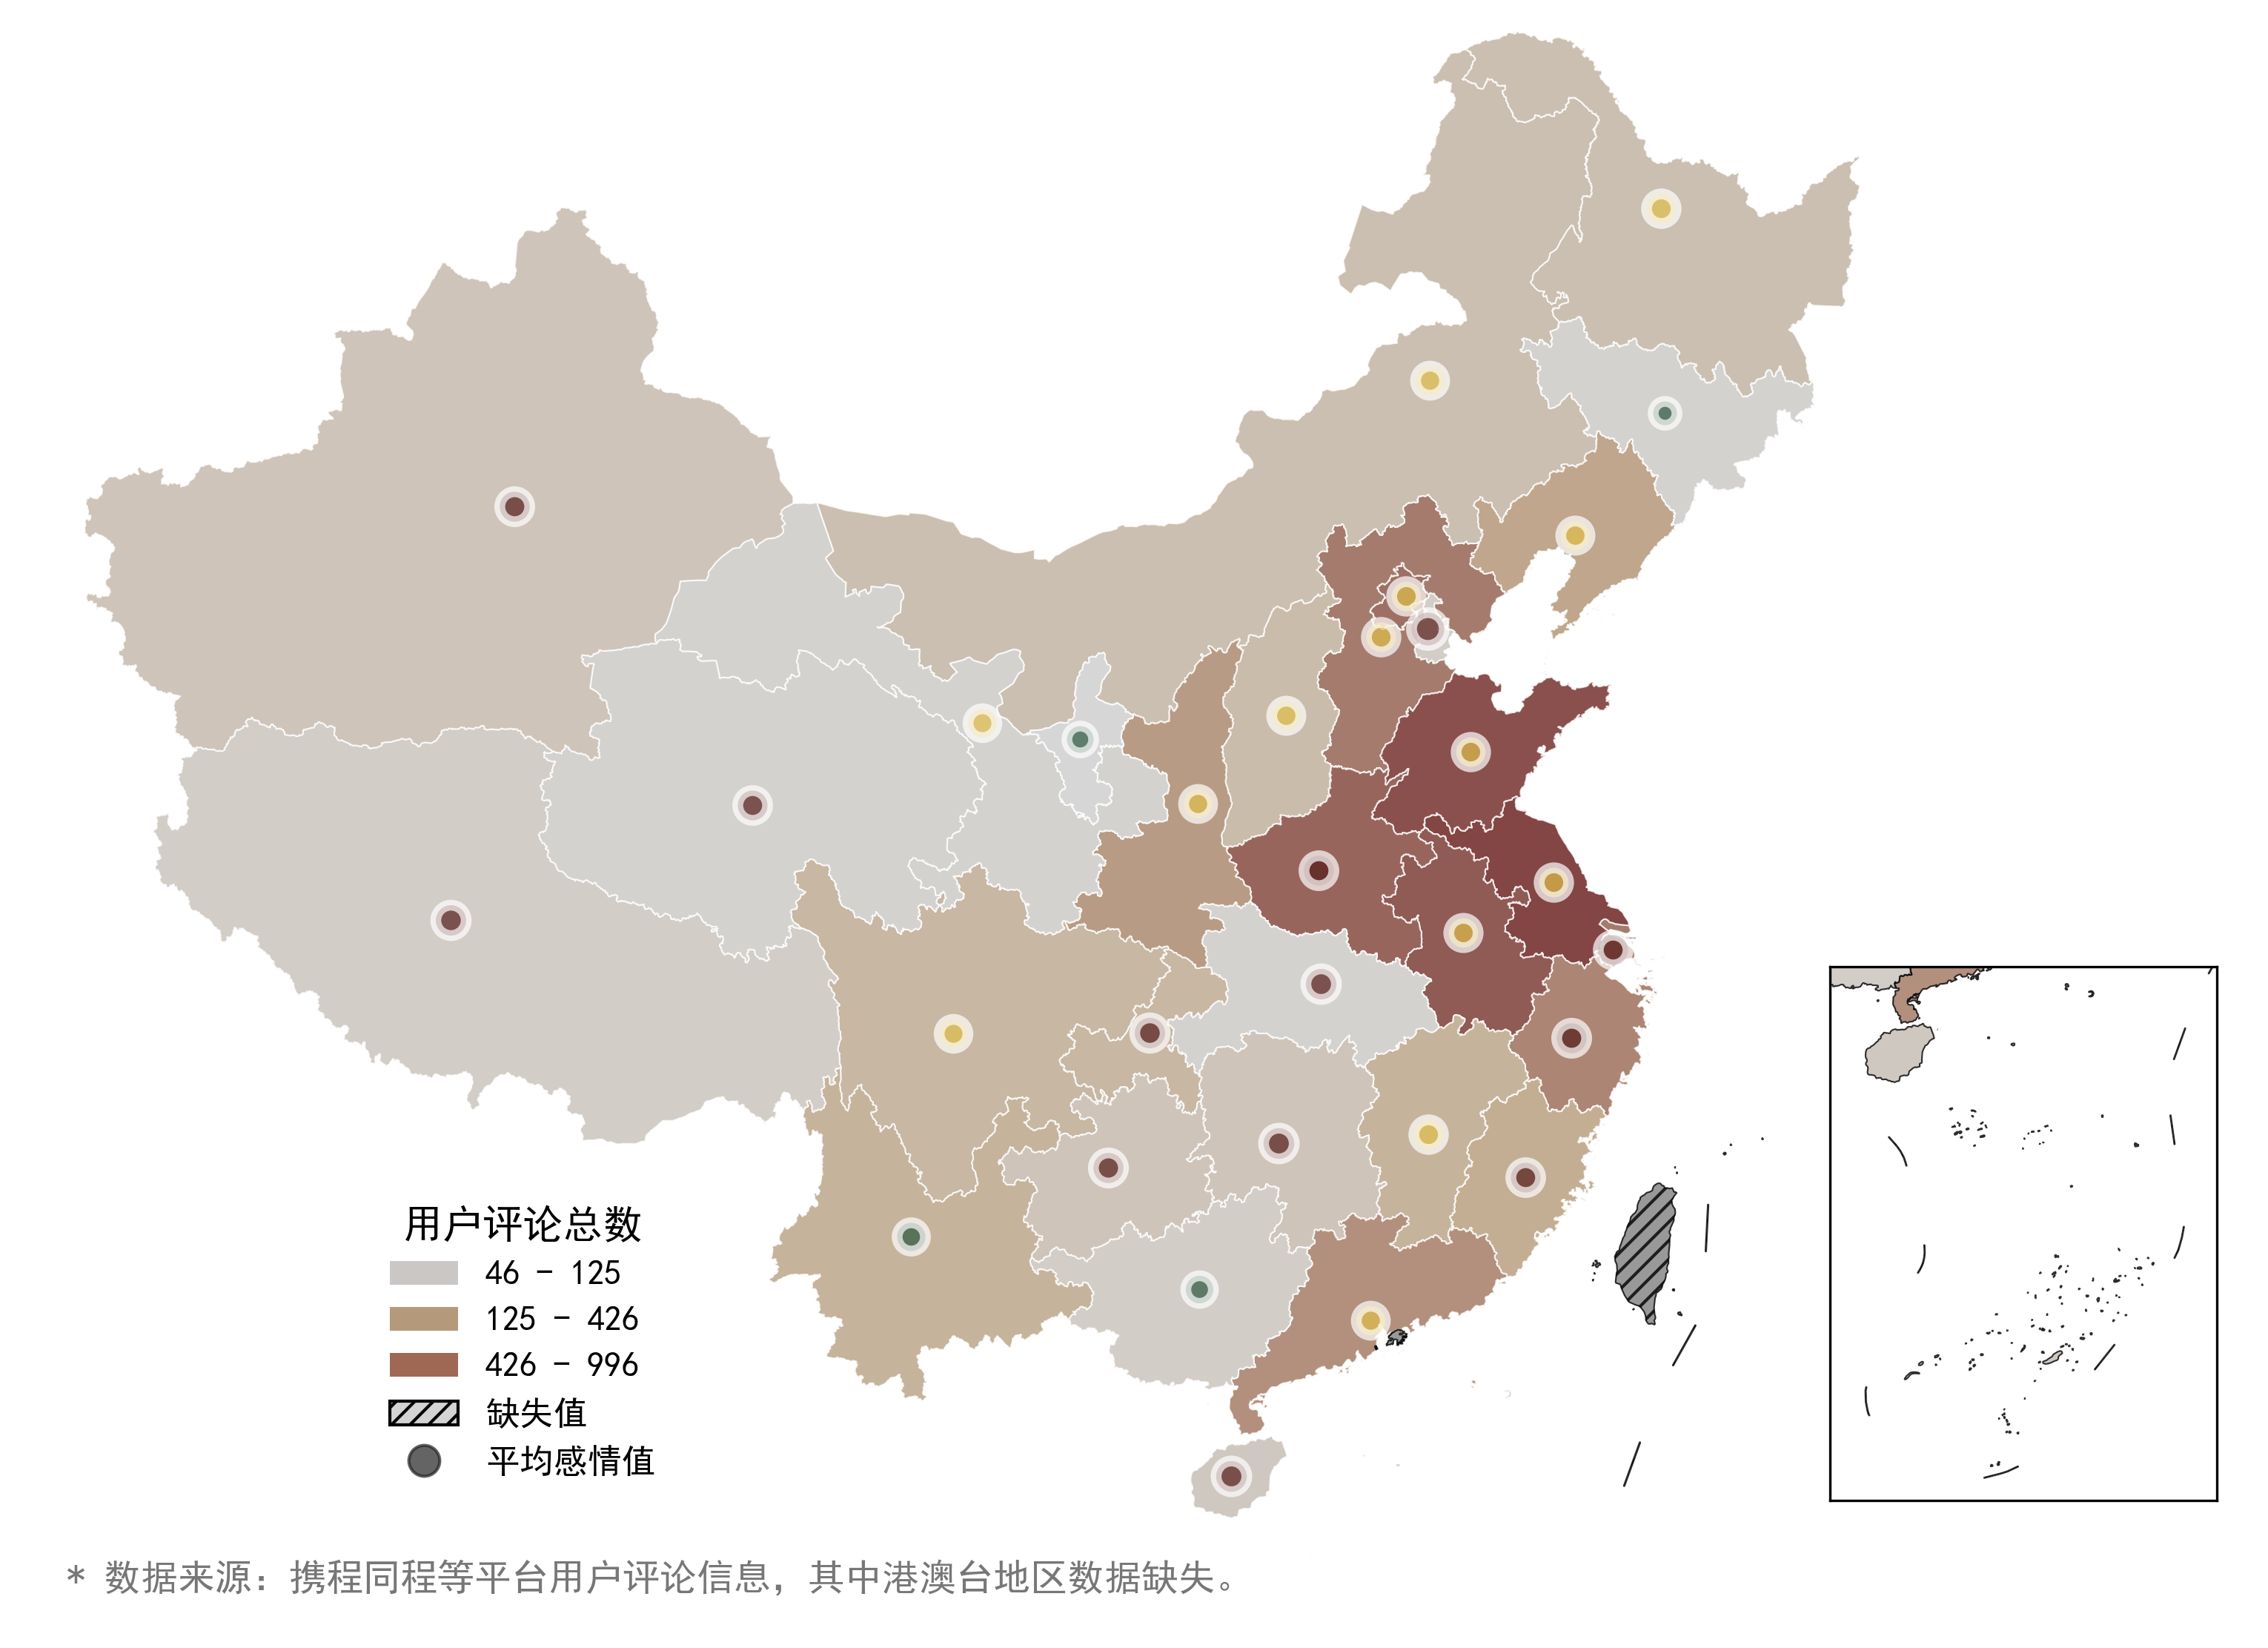

In [108]:
import matplotlib.patches as mpatches
from matplotlib import colors
cmap = colors.LinearSegmentedColormap.from_list('custom_cmap', ['#CCC','#B49775', '#651717'])

# 80-150为x上下限，14-48为y上下限度
# 107, 123 为子图x上下限， 2.8, 23.5为子图y上下限
# bound = gpd.GeoDataFrame({ 'x': [80, 150, 107, 123], 'y': [15, 50, 2.8, 23.5]})
bound = gpd.GeoDataFrame({ 'x': [80, 150, 107, 121.5], 'y': [14, 48, 2.8, 21]})
# 添加矢量列
bound.geometry = bound.apply(lambda row: Point([row['x'], row['y']]), axis=1)
# 初始化CRS
bound.crs = 'EPSG:4326'
# 再投影
bound.to_crs(albers_proj, inplace=True)
# 初始化图床
fig = plt.figure(figsize=(10, 8),dpi=300)
# 创建覆盖整个画布的子图1
ax = fig.add_axes((0, 0, 1, 1))
ax.set_xlim(bound.geometry[0].x, bound.geometry[1].x)
ax.set_ylim(bound.geometry[0].y, bound.geometry[1].y)
# 创建南海插图对应的子图，这里的位置和大小信息是我调好的，(left, bottom, width, height)
ax_child = fig.add_axes([0.80, 0.1, 0.2, 0.3])
data_with_geometry['point'] = data_with_geometry.representative_point()
data_with_geometry.set_geometry('geometry', inplace=True)
k=20
scheme = 'NaturalBreaks' 
missing_kwds = {"color": "grey", "edgecolor": "black","label": "缺失值","hatch": "////"}
# china.to_crs(albers_proj).total_bounds.plot(ax=ax)
# .boundary.plot(ax=ax)
ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax, column='count', cmap=cmap, edgecolor='white', linewidth=0.5, scheme=scheme, k=k, missing_kwds=missing_kwds, alpha=0.8)
# white
ax_child = data_with_geometry.to_crs(albers_proj).plot(ax=ax_child, column='count', cmap=cmap, edgecolor='k', linewidth=0.5, scheme=scheme, k=k, missing_kwds=missing_kwds, alpha=0.8)
ax_child.set_xlim(bound.geometry[2].x, bound.geometry[3].x)
ax_child.set_ylim(bound.geometry[2].y, bound.geometry[3].y)
# 移除子图坐标轴刻度，因为这里的子图需要有边框，所以只移除坐标轴刻度
ax_child.set_xticks([])
ax_child.set_yticks([])
# 根据转换过投影的代表点，循环添加文字至地图上对应位置
data_with_geometry['score'].fillna(0,inplace=True)
for idx, _ in enumerate(data_with_geometry.representative_point().to_crs(albers_proj)):
    size =list(data_with_geometry['score'])[idx]
    if size<=2.12:
        color ="#2B573F"
    elif 2.12<size<=2.30:
        color ="#E0BF4B"
    else:
        color="#561C1A"
    ax.scatter(_.x, _.y, s=40*size,c=color, alpha=0.7,edgecolor='white', linewidths=3.5)  #   size*

# 设置图例标题，位置，排列方式，是否带有阴影
bp = mc.BoxPlot(data_with_geometry['count'])
bins = bp.bins  # 945446
color_name=['#651717','#802827','#9E6854','#B4997A','#CAC7C4']
LegendElement =[mpatches.Patch(facecolor=color_name[4-i], label=f'{int(max(bins[i+1], 0))} - {int(bins[i+2])}' ) for i in range(len(bins)-2)] + [mpatches.Patch(facecolor='lightgrey', edgecolor='black', hatch='////', label='缺失值')]+ \
               [plt.plot([], [], marker='.', ms=20, ls='', mec=None, color='#222', alpha=0.7, label='平均感情值')[0]]
# 将制作好的图例映射对象列表导入legend()中，并配置相关参数
ax.legend( handles = LegendElement, fontsize=11, borderpad=0.5, fancybox=True, framealpha=0.7, ncol=1, title='用户评论总数', title_fontsize=13, frameon=False, bbox_to_anchor=(0.3, 0.25))
ax.axis('off') # 移除坐标轴
plt.tight_layout(pad=1.5) # 调整不同标题之间间距
ax.annotate('* 数据来源：携程同程等平台用户评论信息，其中港澳台地区数据缺失。', xy=(0.03, 0.05), xycoords='figure fraction', 
            horizontalalignment='left',verticalalignment='top', fontsize=12, color='#777')
plt.savefig(f'C:/onedrivers/OneDrive - jsnu.edu.cn/十三届市场调查大赛/设计资料/figures/用户情感分地区图.png', dpi=300, bbox_inches='tight', pad_inches=0.0,transparent=True)
plt.show()

In [ ]:
# print(mc.NaturalBreaks(data_with_geometry['score'],8))
# data_with_geometry